In [199]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from datetime import datetime
from datetime import timezone

In [184]:
CORONA_CASES_URL = "https://www.worldometers.info/coronavirus/"

In [185]:
page = requests.get(CORONA_CASES_URL)
soup = BeautifulSoup(page.content, 'html.parser')
scripts = soup.find_all("script")

In [186]:
data_script = ""

for script in scripts:
    for line in script:
        if "coronavirus-cases-linear" in str(line):
            data_script = line
            break

data_script = data_script[data_script.find("coronavirus-cases-daily"): -1]

In [187]:
start_categories = data_script.find('[', data_script.find('categories'))
end_categories = data_script.find(']', start_categories)
categories = data_script[start_categories + 1: end_categories].replace('"', '').split(',')

In [188]:
start_data = data_script.find('[', data_script.find('data'))
end_data = data_script.find(']', start_data)
data = data_script[start_data + 1: end_data].split(',')

In [189]:
for i, val in enumerate(data):
    if(val == 'null'):
        data.pop(i)
        categories.pop(i)

In [190]:
data_int = []
for value in data:
    data_int.append(int(value))
data = data_int

In [191]:
data = np.array(data)
categories = np.array(categories)

In [193]:
guess_year = "2020"
categories_with_year = []
for date in categories:
    categories_with_year.append(datetime.strptime(date + " " + guess_year, '%b %d %Y'))

In [194]:
categories_timestamp = [] 
for date in categories_with_year:
    categories_timestamp.append(date.replace(tzinfo=timezone.utc).timestamp())

In [195]:
categories_timestamp = np.array(categories_timestamp)
categories_timestamp = categories_timestamp.reshape(-1,1)

In [196]:
lr = LinearRegression() 

In [197]:
X_train, X_test, y_train, y_test = train_test_split(categories_timestamp,data,test_size=0.33,random_state=42)

In [198]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

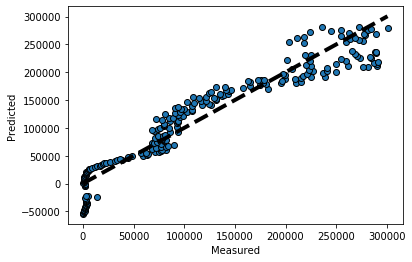

In [200]:
predicted = cross_val_predict(lr, categories_timestamp, data, cv=10)

fig, ax = plt.subplots()
ax.scatter(data, predicted, edgecolors=(0, 0, 0))
ax.plot([data.min(), data.max()], [data.min(), data.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()